## <font color = 'green' id = 'section' > Notebook Système de recommandation_films_lens mahamadousylla955@gmail.com

## <font color = 'blue' id = 'section' >  Sommaire </font>

1. [Importation des librairies](#section_1)    
2. [Lecture des Datasets](#section_2) 
3. [Fusion des fichiers movies et rating](#section_3)    
4. [Prépraration data](#section_4)    
    4.1 [Description](#section_4_1)  
    4.2 [Filtrage de films](#section_4_2)  
    4.3 [Traitement de la variable title](#section_4_3)  
    4.4 [Traitement de la variable tilestamp](#section_4_4)  
5. [Analyse exploratoire](#section_5)  
6. [Système de recommandation](#section_6)  

# <font color ='red' id = 'section_1' > 1. Importation des librairies </font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DeftStack')
warnings.warn('Do not show this message')
print("Not Warning Shown")

Not Warning Shown


In [2]:
import pandas as pd
from pandas import Grouper
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import ast
import scipy as sp
import time
from datetime import datetime
#-------------------------------------------------------------------
from tqdm import tqdm
import gc
#------------------------------------------------------------------

#-------------------------------------------------


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Checklist

Cet ensemble de données (**ml-25m**) décrit l'activité de classement **5 étoiles** et de marquage en texte libre de **MovieLens** , un service de recommandation de films. Il contient **25000095 classements** et **1093360 applications** de balises sur **62423 films**. Ces données ont été créées par **162541 utilisateurs** entre le **09 janvier 1995 et le 21 novembre 2019**. Cet ensemble de données a été généré le **21 novembre 2019**.


## Description des fichiers

Les données sont contenues dans 6  fichiers: 


* **movie.csv** qui contient des infos sur les films:

    * *movieId*, *title*, *genres*


* **rating.csv** qui contient les notes des films par les utilisateurs :

   * *userId*, *movieId*,  *rating*, *timestamp*



* **genome_scores.csv**   qui contient les données de pertinence des balises :

   * *movieId*, *tagId*, *relevance*
   

* **genome_tags.csv** qui contient les descritptions des balises:

   * *tagId*,  *tag*
   
   
* **tag.csv** qui contient des balises appliquées aux films par les utilisateurs :

    * *userId*, *movieId*, *tag*, *timestamp*
    
    
    
* **link.csv**  qui contient des identifiants pouvant être utilisés pour créer des liens vers d'autres sources:

    * *movieId*, *imdbId*, *tmbdId*

## Inventaire des variables:

Les données comprenent des variables  suivantes:

* **userId**:  *ID utilisateur*

    * Les utilisateurs de MovieLens ont été sélectionnés au hasard pour être inclus. Leurs identifiants ont été anonymisés. 
    * Les ID utilisateur sont cohérents entre **ratings.csv** et **tags.csv** (*c'est-à-dire que le même ID fait référence au même utilisateur dans les deux fichiers*).


* **movieID**: *ID de film*

    * Seuls les films avec au moins une **note** ou un **tag** sont inclus dans l'ensemble de données.
    * Les identifiants de film sont cohérents entre **ratings.csv**, **tags.csv**, **movies.csv** et **links.csv** (c'est-à-dire que le même identifiant fait référence au même film dans ces quatre fichiers de données).



* **title**: *Titre des films*

    * Les titres de films sont saisis manuellement ou importés de https://www.themoviedb.org/ et incluent l'année de sortie entre parenthèses. 
    * Des erreurs et des incohérences peuvent exister dans ces titres.


* **genres**: *Genre des films* : Les genres sont une liste séparée par des tubes (|) et sont sélectionnés parmi les suivants :

    * Action
    * Adventure
    * Animation
    * Children's
    * Comedy
    * Crime
    * Documentary
    * Drama
    * Fantasy
    * Film-Noir
    * Horror
    * Musical
    * Mystery
    * Romance
    * Sci-Fi
    * Thriller
    * War
    * Western
    * (no genres listed)


* **ratings**: *Les notes*
     * Les notes sont faites sur une échelle de 5 étoiles, avec des incréments d'une demi-étoile (0,5 étoiles - 5,0 étoiles).
     * Cela évalue la satisfaction de l'utilisateur.



* **timestamps** : *Horodatage*

 * Les horodatages représentent les secondes depuis minuit Temps universel coordonné (UTC) du 1er janvier 1970.
 * Le nombre de secondes écoulées depuis l'avis laissé par l'utilisateur.


* **genom**: *Génome (score and tags)*
    * Le génome des balises code la force avec laquelle les films présentent des propriétés particulières représentées par des balises (atmosphériques, stimulantes, réalistes, etc.). 
    * Le génome des balises a été calculé à l'aide d'un algorithme d'apprentissage automatique sur le contenu fourni par les utilisateurs, y compris les balises, les évaluations et les critiques textuelles.
    
    
* **relevance** Données de pertinence de balise de film



* **tagId**: Les tagId valeurs sont générées lorsque l'ensemble de données est exporté, elles peuvent donc varier d'une version à l'autre des ensembles de données MovieLens.

**A savoir plus** : **Jesse Vig, Shilad Sen et John Riedl. 2012** . Le génome de balise : codage des connaissances communautaires pour soutenir une nouvelle interaction. ACM Trans. Interagir. Renseignement. Syst. 2, 3 : 13 : 1–13 : 44. https://doi.org/10.1145/2362394.2362395

## Objectif

Notre objectif :
 
**1.** **_Nettoyage des données_**

**2.** **_Exploration_**

**3.** **_Construction de système de recommandation_**


## Description des données

Lien vers les données: https://grouplens.org/datasets/movielens/


## References : 

**F. Maxwell Harper and Joseph A. Konstan**. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>

# <font color ='red' id = 'section_2' > 2. Lecture des datasets et aperçu des informations </font>
## <font color = 'red' id = 'section_2_1' > 2.1 Movies

In [4]:
df_movies =  pd.read_csv('movies.csv')

In [5]:
display(df_movies.head(2))
display(df_movies.tail(2))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


,movieId,title,genres
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
df_movies.duplicated().sum()

0

## <font color = 'red' id = 'section_2_2' > 2.2 Ratings

In [9]:
df_ratings =  pd.read_csv('ratings.csv')

In [10]:
display(df_ratings.head(2))
display(df_ratings.tail(2))

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


,userId,movieId,rating,timestamp
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [11]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [12]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
df_ratings.duplicated().sum()

0

## <font color = 'red' id = 'section_2_3' > 2.3 Genome-scores

In [14]:
df_genome_scores =  pd.read_csv('genome-scores.csv')

In [15]:
display(df_genome_scores.head(2))
display(df_genome_scores.tail(2))

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


,movieId,tagId,relevance
15584446,206499,1127,0.14025
15584447,206499,1128,0.03350


In [16]:
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [17]:
df_genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [18]:
df_genome_scores.duplicated().sum()

0

## <font color = 'red' id = 'section_2_4' > 2.4 Genome-tags

In [19]:
df_genome_tags =  pd.read_csv('genome-tags.csv')

In [20]:
display(df_genome_tags.head(3))
display(df_genome_tags.tail(2))

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century


,tagId,tag
1126,1127,zombie
1127,1128,zombies


In [21]:
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [22]:
df_genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

In [23]:
df_genome_tags.duplicated().sum()

0

## <font color = 'red' id = 'section_2_5' > 2.5 Tags

In [24]:
df_tags =  pd.read_csv('tags.csv')

In [25]:
display(df_tags.head(2))
display(df_tags.tail(2))

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


,userId,movieId,tag,timestamp
1093358,162534,189169,disabled,1527518181
1093359,162534,189169,robbery,1527518193


In [26]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [27]:
df_tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [28]:
df_tags.duplicated().sum()

0

## <font color = 'red' id = 'section_2_6' > 2.6 Links

In [29]:
df_links=  pd.read_csv('links.csv')

In [30]:
display(df_links.head(2))
display(df_links.tail(2))

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


,movieId,imdbId,tmdbId
62421,209169,249603,162892.0
62422,209171,55323,79513.0


In [31]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [32]:
df_links.isna().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [33]:
df_links.duplicated().sum()

0

# <font color ='red' id = 'section_3' > 3. Fusion des fichiers Movies et ratings </font>

**Note**: Nous allons d'abord fusionner les fichiers **movies.csv** et **ratings.csv** et continuer à travailler avec. Ces deux fichiers contiennent le maximum d'informations pour pouvoir construire un système de recommandation. On pourra ajouter d'autre  fichier si besoin se fera sentir.

In [34]:
#on va joindre en prenant tous les films
df_movie_rating =  df_movies.merge(df_ratings, how = 'left', on ='movieId')

In [35]:
display(df_movie_rating.head(2))
display(df_movie_rating.tail(2))

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1.439472e+09


,movieId,title,genres,userId,rating,timestamp
25003469,209169,A Girl Thing (2001),(no genres listed),119571.0,3.0,1.574292e+09
25003470,209171,Women of Devil's Island (1962),Action|Adventure|Drama,119571.0,3.0,1.574292e+09


In [36]:
df_movie_rating.shape

(25003471, 6)

In [37]:
df_movie_rating.isna().sum()

movieId         0
title           0
genres          0
userId       3376
rating       3376
timestamp    3376
dtype: int64

In [38]:
## On va reorganiser les colonnes avant de poursuivre. 
userId = df_movie_rating.pop('userId')
df_movie_rating.insert(1, 'userId',  userId )

In [39]:
df_movie_rating.head(2)

,movieId,userId,title,genres,rating,timestamp
0,1,2.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.5,1.141416e+09
1,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1.439472e+09


# <font color ='red' id = 'section_4' > 4. Préparation de données </font>

In [40]:
df_movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25003471 entries, 0 to 25003470
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   userId     float64
 2   title      object 
 3   genres     object 
 4   rating     float64
 5   timestamp  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ GB


## <font color ='red' id = 'section_4_1' > 4.1 Description </font>

In [41]:
pd.DataFrame(df_movie_rating['rating'].describe()).T

,count,mean,std,min,25%,50%,75%,max
rating,25000095.0,3.533854,1.060744,0.5,3.0,3.5,4.0,5.0


<AxesSubplot:ylabel='Frequency'>

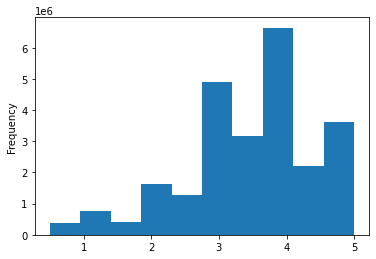

In [42]:
df_movie_rating['rating'].plot.hist(bins = 10)

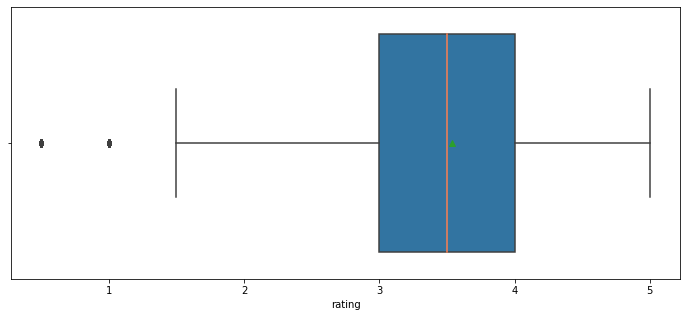

In [43]:
plt.figure(figsize = (12,5))
sns.boxplot( x =  df_movie_rating['rating'], showfliers = True, showmeans = True, medianprops={"color": "coral"})
plt.show()

## Commentaire :

La note moyenne des utilisateurs est de $3.53$ et est également proche de la note médiane.

## <font color ='red' id = 'section_4_2' > 4.2 Flitrage de film</font>
ici, nous allons écarter les films ayant reçu le moins de vote, disons moins de $500$.

In [44]:
df_movie_rating.loc[df_movie_rating['rating'].isna(), :].head()

,movieId,userId,title,genres,rating,timestamp
19111690,25817,NaN,Break of Hearts (1935),Drama|Romance,NaN,NaN
19152834,26361,NaN,Baby Blue Marine (1976),Drama,NaN,NaN
20655616,52696,NaN,"Thousand and One Nights, A (1001 Nights) (1945)",Adventure,NaN,NaN
21033023,56513,NaN,Suicide Killers (2006),Documentary,NaN,NaN
21128123,58209,NaN,Alex in Wonder (Sex and a Girl) (2001),Comedy|Drama,NaN,NaN


## Commentaire: 

Nous allons supprimer ces lignes.

In [45]:
df_movie_rating.dropna(axis = 0, inplace = True)

In [46]:
df_movie_rating.isna().sum()

movieId      0
userId       0
title        0
genres       0
rating       0
timestamp    0
dtype: int64

In [47]:
df_movie_rating.shape

(25000095, 6)

### Les films ayant reçu plus de votes

In [48]:
df_movie_rating['title'].value_counts().head()

Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
Name: title, dtype: int64

In [49]:
films_count =  pd.DataFrame(df_movie_rating['title'].value_counts())
#films_count.rename(columns ={"title": "Count"})
films_count.head()

,title
Forrest Gump (1994),81491
"Shawshank Redemption, The (1994)",81482
Pulp Fiction (1994),79672
"Silence of the Lambs, The (1991)",74127
"Matrix, The (1999)",72674


### Les films ayant reçu moins de votes

In [50]:
## les films ayant reçu moins de 100 votes
index_film_less_voted = films_count[films_count['title'] <= 100 ].index
index_film_less_voted

Index(['Cockneys vs Zombies (2012)',
       'At Play in the Fields of the Lord (1991)', 'Arabesque (1966)',
       'Death of a Salesman (1985)', 'Gainsbourg (Vie Héroïque) (2010)',
       'Going in Style (1979)', 'Woody Allen: A Documentary (2012)',
       'Cold Fish (Tsumetai nettaigyo) (2010)', 'Hick (2011)',
       'Mom and Dad (2017)',
       ...
       'Hot Times (1974)', 'Pictures from Life's Other Side (1971)',
       'The IRA Informant (1997)', 'Her Senior (2015)',
       'Perry Mason: The Case of the Lady in the Lake (1988)',
       'OMG... We're in a Horror Movie (2015)', 'Happy Birthday (2016)',
       'Hell's Caretaker (2013)', 'Wedding Rehearsal (1932)',
       'Women of Devil's Island (1962)'],
      dtype='object', length=48668)

In [51]:
print("Le nombre de films moins votés (100 voix max) s'élève à {} !" .format(len(index_film_less_voted)))

Le nombre de films moins votés (100 voix max) s'élève à 48668 !


### Filtrage

In [52]:
df_movies_rating_filtred =  df_movie_rating[~df_movie_rating['title'].isin(index_film_less_voted)]
df_movies_rating_filtred.head(3)

,movieId,userId,title,genres,rating,timestamp
0,1,2.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.5,1.141416e+09
1,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1.439472e+09
2,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,1.573944e+09


In [53]:
df_movies_rating_filtred.shape

(24440317, 6)

## <font color ='red' id = 'section_4_3' > 4.3 Traitement de la variable _title_ </font>

Dans le but d'effectuer de l'analyse exploratoire, nous allons séparer la variable title en deux variables **Title_film** et **Year**.

In [54]:
df_movies_rating_filtred.head(2)

,movieId,userId,title,genres,rating,timestamp
0,1,2.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.5,1.141416e+09
1,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,1.439472e+09


In [55]:
#df_movie_rating_1 =  df_movies_rating_filtred.copy()
df_movie_rating_year= df_movies_rating_filtred['title'].str[-5:]
df_movie_rating_year = df_movie_rating_year.str.rstrip(')')

In [56]:
df_movies_rating_filtred['Year'] = df_movie_rating_year
## On va reorganiser les colonnes avant de poursuivre. 
year = df_movies_rating_filtred.pop('Year')
df_movies_rating_filtred.insert(3, 'Year_movie_release',  year )

In [57]:
df_movies_rating_filtred.head(2)

,movieId,userId,title,Year_movie_release,genres,rating,timestamp
0,1,2.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.5,1.141416e+09
1,1,3.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,1.439472e+09


In [58]:
#df_movie_rating_1['title'] = df_movie_rating_1['title'].str.split(pat = '(', expand =True)

## <font color ='red' id = 'section_4_4' > 4.4 Traitement de la variable _timestamps_ </font>

In [59]:
timestamp = df_movies_rating_filtred['timestamp']
df_movies_rating_filtred['timestamp'] = pd.to_datetime(timestamp ,unit='s')

In [60]:
df_movies_rating_filtred.head()

,movieId,userId,title,Year_movie_release,genres,rating,timestamp
0,1,2.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.5,2006-03-03 19:57:00
1,1,3.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,2015-08-13 13:23:35
2,1,4.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.0,2019-11-16 22:44:12
3,1,5.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,1997-03-17 19:12:29
4,1,8.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,1998-03-21 15:01:57


In [61]:
df_movies_rating_filtred.rename(columns = {'timestamp': 'Date_voted'}, inplace = True)

In [62]:
df_movies_rating_filtred.head(2)

,movieId,userId,title,Year_movie_release,genres,rating,Date_voted
0,1,2.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.5,2006-03-03 19:57:00
1,1,3.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,2015-08-13 13:23:35


## <font color ='red' id = 'section_5' > 5. Analyse exploratoire </font>
### <font color ='red' id = 'section_5_1' > 5.1 Title vs rating </font>

In [63]:
 df_movies_rating_filtred['title'].nunique()

10290

In [64]:
 df_movies_rating_filtred['Year_movie_release'].nunique()

121

In [65]:
 df_movies_rating_filtred.groupby(('title'))[["rating"]].mean().sort_values(by = 'rating', ascending = False)

,rating
title,
Planet Earth II (2016),4.483096
Planet Earth (2006),4.464797
"Shawshank Redemption, The (1994)",4.413576
Band of Brothers (2001),4.398599
Cosmos,4.326715
...,...
Disaster Movie (2008),1.205566
Barney's Great Adventure (1998),1.195214
Glitter (2001),1.125561


## Affichage des 10 films les mieux notés

<AxesSubplot:ylabel='title'>

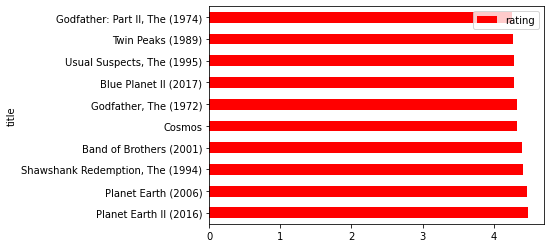

In [66]:
 df_movies_rating_filtred.groupby(('title'))[["rating"]].mean().sort_values(by = 'rating',
                                                ascending = False).iloc[:10].plot.barh(color = 'red')

## Affichage des 10 films les mal notés

<AxesSubplot:ylabel='title'>

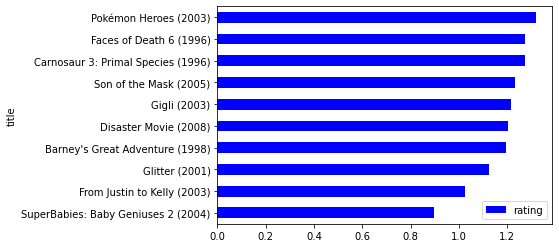

In [67]:
 df_movies_rating_filtred.groupby(('title'))[["rating"]].mean().sort_values(by = 'rating',
                                                ascending = True).iloc[:10].plot.barh(color = 'blue')

## Commentaire:
Ainsi, le film le mieux noté revient à **Planet Earth** sorti en 2006  et le mal apprépcié est sans doute attribué à **SuperBabies: Baby Geniuses 2** sorti en 2004. 

### <font color ='red' id = 'section_5_2' > 5.2 Repartition des films par rapport à l'année de sortie </font>

<AxesSubplot:xlabel='Year_movie_release'>

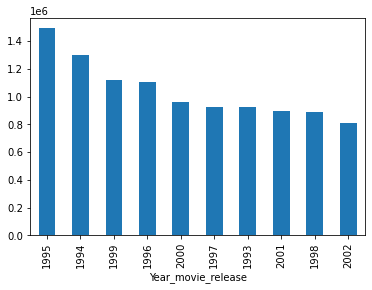

In [68]:
df_movies_rating_filtred.groupby(('Year_movie_release'))['title'].count().sort_values(ascending = False).iloc[:10].plot.bar()

## Commmentaire:
Dans notre jeu de données, il y'a plus  de films sortis en **1995** que toute autre période.

### <font color ='red' id = 'section_5_3' > 5.3 Rating vs genre de films </font>

Nous allons regarder la répartition des notes sur certains genres de films savoir : **Action, Adventure, Animation, Comedy, Drama, Fantasy, Horror, Romance, Thriller, War.**

Ce filtrage de genre a pour but de simplifier l'exploration.


In [69]:
genre_liste =  ['Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Thriller', 'War']

In [70]:
df_movies_rating_filtred['genres'].nunique()

935

In [71]:
df_genres =  df_movies_rating_filtred[df_movies_rating_filtred['genres'].isin(genre_liste)]

In [72]:
df_genres.head(3)

,movieId,userId,title,Year_movie_release,genres,rating,Date_voted
95864,5,18.0,Father of the Bride Part II (1995),1995,Comedy,4.0,2005-02-13 05:52:25
95865,5,48.0,Father of the Bride Part II (1995),1995,Comedy,3.0,1996-12-07 14:35:01
95866,5,61.0,Father of the Bride Part II (1995),1995,Comedy,3.0,2001-04-07 00:56:43


In [73]:
df_genres.shape

(3555115, 7)

In [74]:
 df_genres.groupby(('genres'))[["rating"]].mean().sort_values(by = 'rating', ascending = False)

,rating
genres,
Animation,3.739026
Drama,3.714953
War,3.699858
Fantasy,3.657736
Thriller,3.543836
Romance,3.269862
Comedy,3.256842
Horror,3.146486
Adventure,3.109815


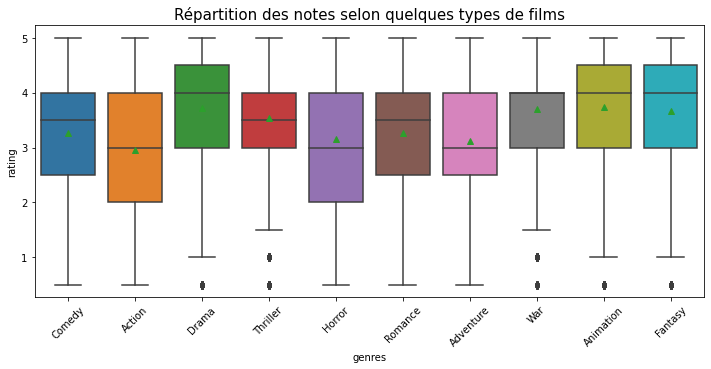

In [75]:
plt.figure(figsize = (12,5))
sns.boxplot(data = df_genres, x =  df_genres['genres'], y = 'rating',   showmeans = True, dodge = False )
plt.xticks(rotation= 45)
plt.title("Répartition des notes selon quelques types de films", fontsize = 15)
plt.show()

## Commentaire: 

Ainsi, en moyenne les films de genres **Animation, Drama** ou encore **war** sont plus appréciés des utilisateurs ceux de types **actions**.

## <font color ='red' id = 'section_6' > 6. Système de recommandation </font>

Objectif: 

* Choisir un utilisateur aléatoire
* Determiner les films qu'il a visionnés et votés 
* Chercher d'autres utilisateurs similaires à travers le coeff de similarité (correlation)
* Afficher les tops films à recommander à ces profils similaires.
* Afficher les tops films à recommander à tous.

### <font color ='red' id = 'section_6_1' > 6.1 Etape 1: Choix aléatoire d'un utilisateur via UserId

In [76]:
df_movies_rating_filtred.head(2)

,movieId,userId,title,Year_movie_release,genres,rating,Date_voted
0,1,2.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.5,2006-03-03 19:57:00
1,1,3.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,2015-08-13 13:23:35


In [77]:
user_random = df_movies_rating_filtred['userId'].sample(n =1, axis = 0, random_state = 45).values

In [78]:
user_random =user_random[0]
user_random

158020.0

In [79]:
print("Notre utilsateur aléatoire porte l'Id: {}.".format(user_random))

Notre utilsateur aléatoire porte l'Id: 158020.0.


### <font color ='red' id = 'section_6_2' > 6.2 Etape 2: Création dataframe utilisateur aléatoire

In [80]:
df_user_recom_15802 = df_movies_rating_filtred[df_movies_rating_filtred['userId'] == user_random]

In [81]:
df_user_recom_15802.head()

,movieId,userId,title,Year_movie_release,genres,rating,Date_voted
55725,1,158020.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,2000-08-07 01:35:38
131473,6,158020.0,Heat (1995),1995,Action|Crime|Thriller,5.0,2000-08-07 02:03:59
194167,11,158020.0,"American President, The (1995)",1995,Comedy|Drama|Romance,4.0,2000-08-15 17:48:28
226259,16,158020.0,Casino (1995),1995,Crime|Drama,4.0,2000-08-07 02:04:41
298926,21,158020.0,Get Shorty (1995),1995,Comedy|Crime|Thriller,4.0,2000-08-15 17:45:04


In [82]:
df_user_recom_15802.shape

(215, 7)

## Commentaire: 
Cet utilisateurr au userId **15802.0** a regardé **215** films en tout, à première vue plutôt anciens. Nous allons par la suite explorer ce dataframe afin de comprendre ce client et lui proposer d'autres films  similaires à ce qu'il a dejà regardé.
Et éventuellement voir les users qui se rapprochent de lui et leurs recommander les films que ce dernier a regardé qui pourront les plaire. 

### <font color ='red'  > Analyse exploratoire de Random User
#### <font color ='red' > A. Répartition des films selon Genres vs rating 

In [83]:
df_random = pd.DataFrame(df_user_recom_15802.groupby(['Year_movie_release'])['rating'].mean().sort_values( ascending = False))
df_random

,rating
Year_movie_release,
2000,5.000000
1939,5.000000
1977,5.000000
1979,5.000000
1972,4.500000
1974,4.500000
1981,4.333333
1983,4.200000
1999,4.166667


### Affichage de 10 films les plus apréciés par l'utilisateur  random_user

In [84]:
df_user_recom_15802.groupby(['genres'])['rating'].mean().sort_values( ascending = False).iloc[:10]

genres
Action|Comedy|Crime|Drama           5.0
Mystery|Thriller                    5.0
Mystery|Sci-Fi|Thriller             5.0
Drama|Horror|Mystery                5.0
Crime|Horror|Thriller               5.0
Crime|Film-Noir|Mystery|Thriller    5.0
Comedy|Drama|Romance|War            5.0
Action|Adventure|Horror|Sci-Fi      5.0
Comedy|Crime|Drama|Thriller         5.0
Children|Drama|Sci-Fi               5.0
Name: rating, dtype: float64

### Affichage de 10 films les moins apréciés par random user

In [85]:
df_user_recom_15802.groupby(['genres'])['rating'].mean().sort_values( ascending = True).iloc[:10]

genres
Action|Horror|Sci-Fi                                         1.0
Action|Adventure|Children|Drama                              1.0
Comedy|Horror                                                1.0
Comedy|Fantasy|Romance                                       1.0
Comedy|Drama|Thriller                                        1.0
Action|Adventure|Mystery|Sci-Fi                              1.0
Crime|Drama|Sci-Fi|Thriller                                  2.0
Adventure|Animation|Children|Comedy|Crime|Fantasy|Mystery    2.0
Comedy|Fantasy|Romance|Sci-Fi                                2.0
Horror|Mystery|Thriller                                      2.0
Name: rating, dtype: float64

### Visualisation de ses films préférés

In [86]:
list_year_rating_4_plus =  df_random[df_random["rating"]> 4].index.to_list()
list_year_rating_4_plus

['2000', '1939', '1977', '1979', '1972', '1974', '1981', '1983', '1999']

In [87]:
df_films_4_plus = df_user_recom_15802[df_user_recom_15802['Year_movie_release'].isin(list_year_rating_4_plus)]

In [88]:
df_films_4_plus.head()

,movieId,userId,title,Year_movie_release,genres,rating,Date_voted
1745926,260,158020.0,Star Wars: Episode IV - A New Hope (1977),1977,Action|Adventure|Sci-Fi,5.0,2000-08-07 01:57:01
4966445,858,158020.0,"Godfather, The (1972)",1972,Crime|Drama,5.0,2000-08-07 01:54:54
5196905,919,158020.0,"Wizard of Oz, The (1939)",1939,Adventure|Children|Fantasy|Musical,5.0,2000-08-07 01:57:01
6341345,1198,158020.0,Raiders of the Lost Ark (Indiana Jones and the...,1981,Action|Adventure,5.0,2000-08-07 01:32:54
6570786,1210,158020.0,Star Wars: Episode VI - Return of the Jedi (1983),1983,Action|Adventure|Sci-Fi,5.0,2000-08-07 01:47:04


In [89]:
df_films_4_plus.shape

(28, 7)

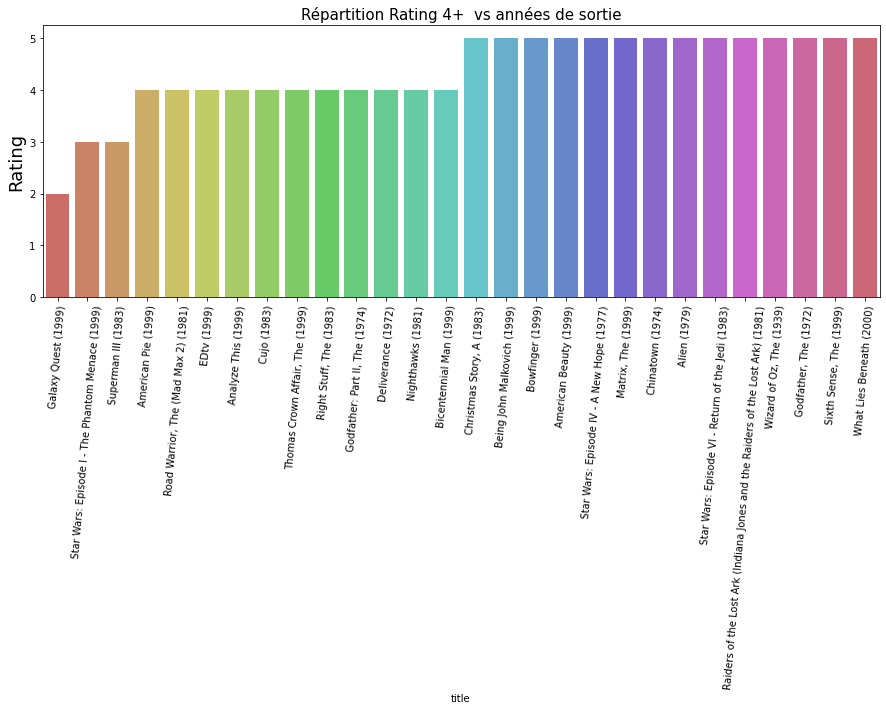

In [90]:
plt.rcParams['figure.figsize'] = [15,5]
sns.barplot(x = 'title', y= 'rating',  palette = 'hls',  data = df_films_4_plus, 
            order = df_films_4_plus.sort_values('rating').title)
plt.xticks(rotation = 85)
plt.ylabel("Rating", fontsize = 18)
plt.title("Répartition Rating 4+  vs années de sortie", fontsize = 15)
plt.show(block = True)

### <font color ='red' > B. Evolution des notes de l'utilisateur aléatoire

In [91]:
df_time = df_user_recom_15802.set_index('Date_voted')
df_time.head()

,movieId,userId,title,Year_movie_release,genres,rating
Date_voted,,,,,,
2000-08-07 01:35:38,1,158020.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0
2000-08-07 02:03:59,6,158020.0,Heat (1995),1995,Action|Crime|Thriller,5.0
2000-08-15 17:48:28,11,158020.0,"American President, The (1995)",1995,Comedy|Drama|Romance,4.0
2000-08-07 02:04:41,16,158020.0,Casino (1995),1995,Crime|Drama,4.0
2000-08-15 17:45:04,21,158020.0,Get Shorty (1995),1995,Comedy|Crime|Thriller,4.0


In [92]:
df_time = pd.DataFrame(df_time.groupby(pd.Grouper(freq="D"))['rating'].mean())
df_time = df_time.reset_index()
df_time.dropna(inplace = True)

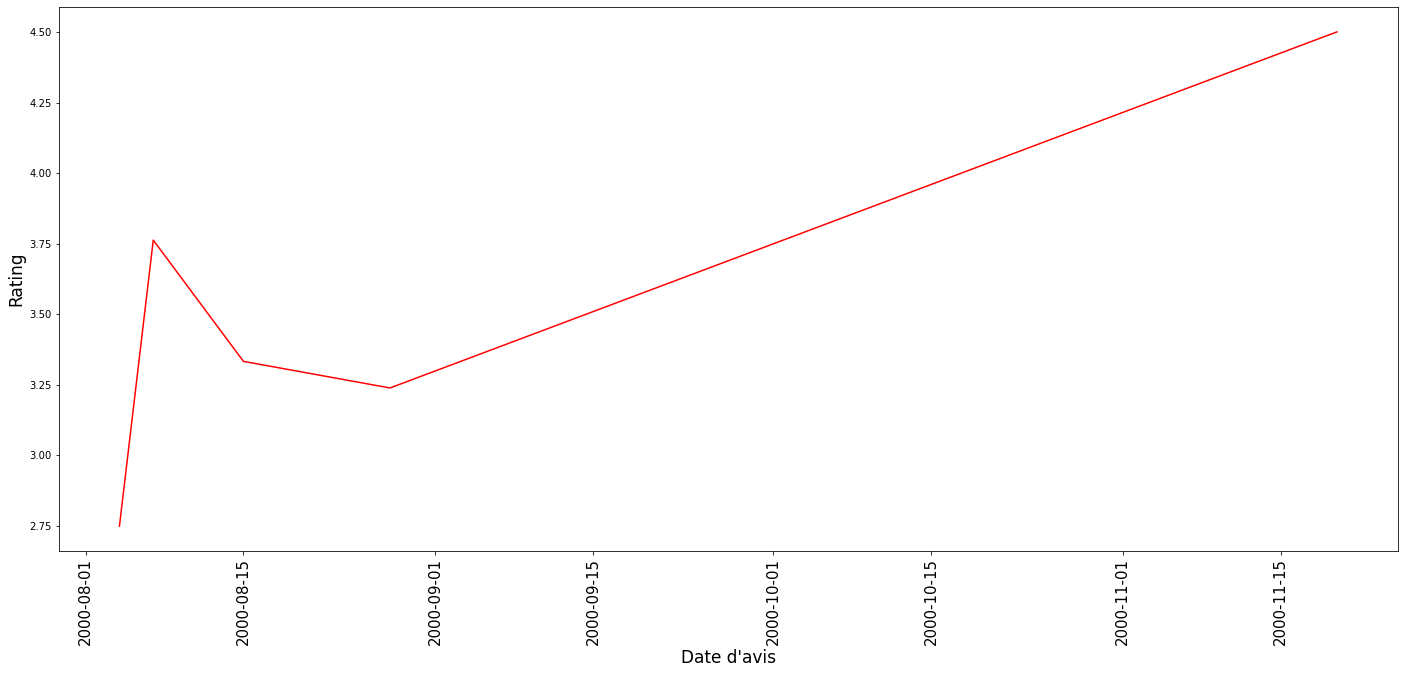

In [93]:
plt.subplots(figsize=(24,10)) 
sns.lineplot(data = df_time, x = 'Date_voted', y = 'rating', color = 'red') 
plt.xticks(rotation = 90, fontsize = 15)
plt.ylabel("Rating", fontsize = 17)
plt.xlabel("Date d'avis", fontsize = 17)
plt.show()

## Commentaire:

En moyenne, notre **random_user** donne des notes de plus en plus grandes (**plus de 3.25**) aprés sept 2000.

### <font color ='red' id = 'section_6_3' > 6.3 Etape 3: Selection d'autres utilisateurs
    
Dans cette sous section, on va sélectionner tous les autres utilisateurs ayant regardé les mêmes films que user **15802**. Et construire un dataframe associé.

In [94]:
movies_watched_15802 = df_user_recom_15802['title'].to_list()
movies_watched_15802[:6]

['Toy Story (1995)',
 'Heat (1995)',
 'American President, The (1995)',
 'Casino (1995)',
 'Get Shorty (1995)',
 'Powder (1995)']

In [95]:
df_others_movies_users = df_movies_rating_filtred[df_movies_rating_filtred['title'].isin(movies_watched_15802)]
df_others_movies_users.head(3)

,movieId,userId,title,Year_movie_release,genres,rating,Date_voted
0,1,2.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.5,2006-03-03 19:57:00
1,1,3.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,4.0,2015-08-13 13:23:35
2,1,4.0,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,3.0,2019-11-16 22:44:12


In [96]:
df_others_movies_users.shape

(4093241, 7)

### <font color ='green'  > Rapport other users vs Random user

In [97]:
df_common_movies = pd.pivot_table(df_others_movies_users, index = 'userId', columns = ['title'], values = 'rating')

In [98]:
df_common_movies.head(3)

title,"Abyss, The (1989)","Addams Family, The (1991)",Adventures in Babysitting (1987),"Adventures of Robin Hood, The (1938)",Aladdin (1992),Alien (1979),Alien Nation (1988),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Amadeus (1984),American Beauty (1999),American Pie (1999),"American President, The (1995)",Analyze This (1999),Arachnophobia (1990),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Basic Instinct (1992),Batman (1989),Being John Malkovich (1999),Bicentennial Man (1999),"Big Lebowski, The (1998)","Birdcage, The (1996)",Blade Runner (1982),"Blue Lagoon, The (1980)",Bowfinger (1999),Brazil (1985),"Breakfast Club, The (1985)",Bulworth (1998),Cape Fear (1991),Casino (1995),Chasing Amy (1997),Children of the Corn (1984),Chinatown (1974),"Christmas Story, A (1983)",Clerks (1994),Clue (1985),Clueless (1995),Cocoon (1985),Congo (1995),Conspiracy Theory (1997),Contact (1997),Crimson Tide (1995),Crocodile Dundee (1986),Crocodile Dundee II (1988),Cujo (1983),Cyrano de Bergerac (1990),Dangerous Liaisons (1988),"Dark Crystal, The (1982)",Dazed and Confused (1993),Dead Poets Society (1989),Dead Ringers (1988),Deliverance (1972),Demolition Man (1993),Die Hard (1988),Diner (1982),E.T. the Extra-Terrestrial (1982),EDtv (1999),Enemy of the State (1998),Event Horizon (1997),F/X (1986),Fargo (1996),Fatal Attraction (1987),Firestarter (1984),Flight of the Navigator (1986),Forrest Gump (1994),"Fugitive, The (1993)",Full Metal Jacket (1987),"Full Monty, The (1997)",Galaxy Quest (1999),"Game, The (1997)",Gattaca (1997),Get Shorty (1995),Ghost (1990),"Godfather, The (1972)","Godfather: Part II, The (1974)","Godfather: Part III, The (1990)","Golden Child, The (1986)","Good Morning, Vietnam (1987)",Goodfellas (1990),Grosse Pointe Blank (1997),Groundhog Day (1993),Happy Gilmore (1996),Heat (1995),"Honey, I Shrunk the Kids (1989)",Howard the Duck (1986),"Hunt for Red October, The (1990)",I Know What You Did Last Summer (1997),In the Line of Fire (1993),Independence Day (a.k.a. ID4) (1996),Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),JFK (1991),Jacob's Ladder (1990),Jerry Maguire (1996),"Jewel of the Nile, The (1985)",Jumpin' Jack Flash (1986),Jurassic Park (1993),"Karate Kid, Part II, The (1986)","Karate Kid, Part III, The (1989)","Karate Kid, The (1984)",King Kong (1933),L.A. Confidential (1997),L.A. Story (1991),Labyrinth (1986),"League of Their Own, A (1992)",Leaving Las Vegas (1995),Lethal Weapon (1987),Lethal Weapon 2 (1989),Liar Liar (1997),Life Is Beautiful (La Vita è bella) (1997),Lord of the Flies (1963),Mad Max Beyond Thunderdome (1985),Mallrats (1995),"Maltese Falcon, The (1941)",Mars Attacks! (1996),"Mask, The (1994)","Matrix, The (1999)",Men in Black (a.k.a. MIB) (1997),Midnight in the Garden of Good and Evil (1997),Mission: Impossible (1996),Mrs. Doubtfire (1993),Mulholland Falls (1996),My Best Friend's Wedding (1997),My Cousin Vinny (1992),"NeverEnding Story, The (1984)",Nighthawks (1981),No Way Out (1987),"Nutty Professor, The (1996)","Opposite of Sex, The (1998)",Out of Sight (1998),Parenthood (1989),Patriot Games (1992),"Perfect Murder, A (1998)",Platoon (1986),Pleasantville (1998),Poltergeist (1982),Poltergeist II: The Other Side (1986),Poltergeist III (1988),Powder (1995),Predator (1987),Predator 2 (1990),Primary Colors (1998),"Princess Bride, The (1987)",Private Parts (1997),Pulp Fiction (1994),Raging Bull (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Reality Bites (1994),Reservoir Dogs (1992),"Right Stuff, The (1983)","Road Warrior, The (Mad Max 2) (1981)",RoboCop (1987),"Rocketeer, The (1991)",Romancing the Stone (1984),"Running Man, The (1987)",Rushmore (1998),Scream (1996),Seven (a.k.a. Se7en) (1995),"Seventh Sign, The (1988)","Silence of the Lambs, The (1991)","Sixth Sense, The (1999)",Smok

In [99]:
df_common_movies.shape

(160301, 215)

In [100]:
df_common_movies.loc[df_common_movies.index==user_random, :]

title,"Abyss, The (1989)","Addams Family, The (1991)",Adventures in Babysitting (1987),"Adventures of Robin Hood, The (1938)",Aladdin (1992),Alien (1979),Alien Nation (1988),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Amadeus (1984),American Beauty (1999),American Pie (1999),"American President, The (1995)",Analyze This (1999),Arachnophobia (1990),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Basic Instinct (1992),Batman (1989),Being John Malkovich (1999),Bicentennial Man (1999),"Big Lebowski, The (1998)","Birdcage, The (1996)",Blade Runner (1982),"Blue Lagoon, The (1980)",Bowfinger (1999),Brazil (1985),"Breakfast Club, The (1985)",Bulworth (1998),Cape Fear (1991),Casino (1995),Chasing Amy (1997),Children of the Corn (1984),Chinatown (1974),"Christmas Story, A (1983)",Clerks (1994),Clue (1985),Clueless (1995),Cocoon (1985),Congo (1995),Conspiracy Theory (1997),Contact (1997),Crimson Tide (1995),Crocodile Dundee (1986),Crocodile Dundee II (1988),Cujo (1983),Cyrano de Bergerac (1990),Dangerous Liaisons (1988),"Dark Crystal, The (1982)",Dazed and Confused (1993),Dead Poets Society (1989),Dead Ringers (1988),Deliverance (1972),Demolition Man (1993),Die Hard (1988),Diner (1982),E.T. the Extra-Terrestrial (1982),EDtv (1999),Enemy of the State (1998),Event Horizon (1997),F/X (1986),Fargo (1996),Fatal Attraction (1987),Firestarter (1984),Flight of the Navigator (1986),Forrest Gump (1994),"Fugitive, The (1993)",Full Metal Jacket (1987),"Full Monty, The (1997)",Galaxy Quest (1999),"Game, The (1997)",Gattaca (1997),Get Shorty (1995),Ghost (1990),"Godfather, The (1972)","Godfather: Part II, The (1974)","Godfather: Part III, The (1990)","Golden Child, The (1986)","Good Morning, Vietnam (1987)",Goodfellas (1990),Grosse Pointe Blank (1997),Groundhog Day (1993),Happy Gilmore (1996),Heat (1995),"Honey, I Shrunk the Kids (1989)",Howard the Duck (1986),"Hunt for Red October, The (1990)",I Know What You Did Last Summer (1997),In the Line of Fire (1993),Independence Day (a.k.a. ID4) (1996),Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),JFK (1991),Jacob's Ladder (1990),Jerry Maguire (1996),"Jewel of the Nile, The (1985)",Jumpin' Jack Flash (1986),Jurassic Park (1993),"Karate Kid, Part II, The (1986)","Karate Kid, Part III, The (1989)","Karate Kid, The (1984)",King Kong (1933),L.A. Confidential (1997),L.A. Story (1991),Labyrinth (1986),"League of Their Own, A (1992)",Leaving Las Vegas (1995),Lethal Weapon (1987),Lethal Weapon 2 (1989),Liar Liar (1997),Life Is Beautiful (La Vita è bella) (1997),Lord of the Flies (1963),Mad Max Beyond Thunderdome (1985),Mallrats (1995),"Maltese Falcon, The (1941)",Mars Attacks! (1996),"Mask, The (1994)","Matrix, The (1999)",Men in Black (a.k.a. MIB) (1997),Midnight in the Garden of Good and Evil (1997),Mission: Impossible (1996),Mrs. Doubtfire (1993),Mulholland Falls (1996),My Best Friend's Wedding (1997),My Cousin Vinny (1992),"NeverEnding Story, The (1984)",Nighthawks (1981),No Way Out (1987),"Nutty Professor, The (1996)","Opposite of Sex, The (1998)",Out of Sight (1998),Parenthood (1989),Patriot Games (1992),"Perfect Murder, A (1998)",Platoon (1986),Pleasantville (1998),Poltergeist (1982),Poltergeist II: The Other Side (1986),Poltergeist III (1988),Powder (1995),Predator (1987),Predator 2 (1990),Primary Colors (1998),"Princess Bride, The (1987)",Private Parts (1997),Pulp Fiction (1994),Raging Bull (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Reality Bites (1994),Reservoir Dogs (1992),"Right Stuff, The (1983)","Road Warrior, The (Mad Max 2) (1981)",RoboCop (1987),"Rocketeer, The (1991)",Romancing the Stone (1984),"Running Man, The (1987)",Rushmore (1998),Scream (1996),Seven (a.k.a. Se7en) (1995),"Seventh Sign, The (1988)","Silence of the Lambs, The (1991)","Sixth Sense, The (1999)",Smok

In [101]:
df_common_movies_not_null = df_common_movies.T.notnull().sum().reset_index()
df_common_movies_not_null.rename(columns ={0: 'Count_movies_common_15802'}, inplace = True)
df_common_movies_not_null.head()

,userId,Count_movies_common_15802
0,1.0,6
1,2.0,38
2,3.0,41
3,4.0,24
4,5.0,30


In [102]:
df_common_movies_not_null.shape

(160301, 2)

In [103]:
df_common_movies_not_null.loc[df_common_movies_not_null.userId==user_random, :]

,userId,Count_movies_common_15802
155847,158020.0,215


In [104]:
df_common_movies_not_null.Count_movies_common_15802.unique()

array([  6,  38,  41,  24,  30,  13,  56,  44,  17,   3, 110,  52,  26,
         1,  63,  25,  22, 100,  19,  18,  12,  81,  16,  11,   5,  27,
        23,  55,  92,   4,   7,  10,   9,  21,   8,   2,  45,  60,  64,
        14, 160,  67,  20,  29,  61,  53,  48,  42, 150,  49,  15,  46,
        59,  50, 114, 102,  54,  85,  83,  36,  69,  32,  87,  84,  40,
        89,  78,  28,  37,  35,  58,  72,  43,  93,  31,  47,  34,  66,
       113, 116, 122,  90, 126,  62,  39,  94,  57,  75,  33, 137, 118,
        76, 119,  71, 101,  68, 155,  70,  95, 104, 103, 144, 130, 146,
        77,  99, 111, 143, 124, 131,  82,  65, 117, 134, 127, 128,  98,
        96,  91,  86, 112, 129,  51, 121, 109, 148, 106,  79,  74,  88,
       163, 191, 107, 174, 151, 147, 141, 199, 152, 167, 156,  97,  73,
       158, 202, 115, 108, 166, 162, 123, 136,  80, 105, 135, 149, 140,
       138, 133, 161, 132, 125, 145, 187, 157, 142, 173, 165, 154, 196,
       183, 120, 176, 194, 164, 193, 182, 195, 171, 159, 188, 16

## Commentaire:

Il y'a **160300** autres utilisateurs qui ont regardé les mêmes films que l'utilisateur **aléatoire**.

### <font color ='red' id = 'section_6_4' > 6.4 Etape 4: Top users common with userId 15802
    
Ici, nous recherchons les  utilisateurs qui ont regardé au moins **50%** des films que l'utilisateur aléatoire avait déja visionné.

In [105]:
top_users_common_15802 = df_common_movies_not_null[df_common_movies_not_null['Count_movies_common_15802'] >= (df_common_movies.shape[1])*0.5]
top_users_common_15802.tail()

,userId,Count_movies_common_15802
160148,162387.0,126
160243,162484.0,115
160254,162495.0,115
160275,162516.0,204
160278,162519.0,116


In [106]:
top_users_common_15802.shape

(4209, 2)

In [107]:
top_users_common_15802.loc[top_users_common_15802.userId==user_random, :]

,userId,Count_movies_common_15802
155847,158020.0,215


## Commentaire:
Nous avons  donc **4209** utlisateurs qui ont regardé au moins **50%** des films que  l'utilisateur **15802** avait visionné.

### <font color ='red' id = 'section_6_5' > 6.5 Etape 5: Top movies common
    
On va filtrer les films selon ces utilisateurs qui ont visionné au moins **50%** des films de random users.

In [108]:
df_movies_common_50 =   df_common_movies[df_common_movies.index.isin((top_users_common_15802.userId))]
df_movies_common_50.head()

title,"Abyss, The (1989)","Addams Family, The (1991)",Adventures in Babysitting (1987),"Adventures of Robin Hood, The (1938)",Aladdin (1992),Alien (1979),Alien Nation (1988),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Amadeus (1984),American Beauty (1999),American Pie (1999),"American President, The (1995)",Analyze This (1999),Arachnophobia (1990),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Basic Instinct (1992),Batman (1989),Being John Malkovich (1999),Bicentennial Man (1999),"Big Lebowski, The (1998)","Birdcage, The (1996)",Blade Runner (1982),"Blue Lagoon, The (1980)",Bowfinger (1999),Brazil (1985),"Breakfast Club, The (1985)",Bulworth (1998),Cape Fear (1991),Casino (1995),Chasing Amy (1997),Children of the Corn (1984),Chinatown (1974),"Christmas Story, A (1983)",Clerks (1994),Clue (1985),Clueless (1995),Cocoon (1985),Congo (1995),Conspiracy Theory (1997),Contact (1997),Crimson Tide (1995),Crocodile Dundee (1986),Crocodile Dundee II (1988),Cujo (1983),Cyrano de Bergerac (1990),Dangerous Liaisons (1988),"Dark Crystal, The (1982)",Dazed and Confused (1993),Dead Poets Society (1989),Dead Ringers (1988),Deliverance (1972),Demolition Man (1993),Die Hard (1988),Diner (1982),E.T. the Extra-Terrestrial (1982),EDtv (1999),Enemy of the State (1998),Event Horizon (1997),F/X (1986),Fargo (1996),Fatal Attraction (1987),Firestarter (1984),Flight of the Navigator (1986),Forrest Gump (1994),"Fugitive, The (1993)",Full Metal Jacket (1987),"Full Monty, The (1997)",Galaxy Quest (1999),"Game, The (1997)",Gattaca (1997),Get Shorty (1995),Ghost (1990),"Godfather, The (1972)","Godfather: Part II, The (1974)","Godfather: Part III, The (1990)","Golden Child, The (1986)","Good Morning, Vietnam (1987)",Goodfellas (1990),Grosse Pointe Blank (1997),Groundhog Day (1993),Happy Gilmore (1996),Heat (1995),"Honey, I Shrunk the Kids (1989)",Howard the Duck (1986),"Hunt for Red October, The (1990)",I Know What You Did Last Summer (1997),In the Line of Fire (1993),Independence Day (a.k.a. ID4) (1996),Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),JFK (1991),Jacob's Ladder (1990),Jerry Maguire (1996),"Jewel of the Nile, The (1985)",Jumpin' Jack Flash (1986),Jurassic Park (1993),"Karate Kid, Part II, The (1986)","Karate Kid, Part III, The (1989)","Karate Kid, The (1984)",King Kong (1933),L.A. Confidential (1997),L.A. Story (1991),Labyrinth (1986),"League of Their Own, A (1992)",Leaving Las Vegas (1995),Lethal Weapon (1987),Lethal Weapon 2 (1989),Liar Liar (1997),Life Is Beautiful (La Vita è bella) (1997),Lord of the Flies (1963),Mad Max Beyond Thunderdome (1985),Mallrats (1995),"Maltese Falcon, The (1941)",Mars Attacks! (1996),"Mask, The (1994)","Matrix, The (1999)",Men in Black (a.k.a. MIB) (1997),Midnight in the Garden of Good and Evil (1997),Mission: Impossible (1996),Mrs. Doubtfire (1993),Mulholland Falls (1996),My Best Friend's Wedding (1997),My Cousin Vinny (1992),"NeverEnding Story, The (1984)",Nighthawks (1981),No Way Out (1987),"Nutty Professor, The (1996)","Opposite of Sex, The (1998)",Out of Sight (1998),Parenthood (1989),Patriot Games (1992),"Perfect Murder, A (1998)",Platoon (1986),Pleasantville (1998),Poltergeist (1982),Poltergeist II: The Other Side (1986),Poltergeist III (1988),Powder (1995),Predator (1987),Predator 2 (1990),Primary Colors (1998),"Princess Bride, The (1987)",Private Parts (1997),Pulp Fiction (1994),Raging Bull (1980),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),Reality Bites (1994),Reservoir Dogs (1992),"Right Stuff, The (1983)","Road Warrior, The (Mad Max 2) (1981)",RoboCop (1987),"Rocketeer, The (1991)",Romancing the Stone (1984),"Running Man, The (1987)",Rushmore (1998),Scream (1996),Seven (a.k.a. Se7en) (1995),"Seventh Sign, The (1988)","Silence of the Lambs, The (1991)","Sixth Sense, The (1999)",Smok

In [109]:
df_movies_common_50.shape

(4209, 215)

### <font color ='red' id = 'section_6_6' > 6.6 Etape 6: Calcul de coefficient de similarité
    
Le coefficient de correlation est un bon indicateur pour cacluler la similarité avec le random user.

In [110]:
df_users_similar = df_movies_common_50.T.corr()

In [111]:
df_users_similar =df_users_similar.unstack(level =-1).sort_values(ascending = False).drop_duplicates()
df_users_similar

userId    userId  
12.0      12.0        1.000000
153086.0  58588.0     0.998084
140577.0  58588.0     0.998083
115907.0  144714.0    0.994443
          153086.0    0.994442
                        ...   
18484.0   29625.0    -0.543388
20469.0   78616.0    -0.545106
38528.0   125341.0   -0.552663
          54881.0    -0.559377
12.0      129440.0         NaN
Length: 8842515, dtype: float64

In [112]:
df_users_similar_random_user = pd.DataFrame(df_users_similar)
df_users_similar_random_user.head()

0
userId   userId            
12.0     12.0      1.000000
153086.0 58588.0   0.998084
140577.0 58588.0   0.998083
115907.0 144714.0  0.994443
         153086.0  0.994442

In [113]:
df_users_similar_random_user =  df_users_similar_random_user.rename(columns ={0: 'Coeff_similarity'})
df_users_similar_random_user.head(3)

,,Coeff_similarity
userId,userId,
12.0,12.0,1.000000
153086.0,58588.0,0.998084
140577.0,58588.0,0.998083


In [114]:
df_users_similar_random_user.index.names = ["Random_User", "OtherUserId"]

In [115]:
display(df_users_similar_random_user.head(2))
df_users_similar_random_user.reset_index(inplace = True)

,,Coeff_similarity
Random_User,OtherUserId,
12.0,12.0,1.000000
153086.0,58588.0,0.998084


In [116]:
display(df_users_similar_random_user.head(5))
print("La dimension est: {}.".format(df_users_similar_random_user.shape))

,Random_User,OtherUserId,Coeff_similarity
0,12.0,12.0,1.000000
1,153086.0,58588.0,0.998084
2,140577.0,58588.0,0.998083
3,115907.0,144714.0,0.994443
4,115907.0,153086.0,0.994442


La dimension est: (8842515, 3).


### <font color ='red' id = 'section_6_7' > 6.7 Etape 7: Top utilisateurs similaires

In [117]:
df_users_similar_random_user =df_users_similar_random_user.loc[df_users_similar_random_user.Random_User==user_random, :]
df_users_similar_random_user

,Random_User,OtherUserId,Coeff_similarity
100874,158020.0,154558.0,0.580030
120831,158020.0,28780.0,0.571598
160025,158020.0,31770.0,0.558122
177649,158020.0,130145.0,0.552825
220716,158020.0,16452.0,0.541581
...,...,...,...
8774865,158020.0,109671.0,-0.148629
8783488,158020.0,162093.0,-0.156959
8796426,158020.0,35479.0,-0.171682
8806913,158020.0,37175.0,-0.186552


### Commentaire:
* Nous allons maintenant sélectionner les autres utilisateurs ayant un fort coef de similarité disons plus de **0.53** pour ce cas là. 

* En prenant un autre utilisateur aléatoire, on pourraît avoir des coeffs de similarité plus élévés.

In [118]:
top_users_corr_random_user = df_users_similar_random_user[df_users_similar_random_user["Coeff_similarity"] > 0.53 ].reset_index(drop=True)
top_users_corr_random_user

,Random_User,OtherUserId,Coeff_similarity
0,158020.0,154558.0,0.580030
1,158020.0,28780.0,0.571598
2,158020.0,31770.0,0.558122
3,158020.0,130145.0,0.552825
4,158020.0,16452.0,0.541581
5,158020.0,134914.0,0.541024
6,158020.0,25980.0,0.539640
7,158020.0,94433.0,0.537575
8,158020.0,10200.0,0.537113
9,158020.0,5027.0,0.532923


In [119]:
print("Nous avons donc {} potentiels autres utilisateurs susceptibles d'aimmer les mêmes films que ceux visionnés par random User.".format(top_users_corr_random_user.shape[0]))

Nous avons donc 10 potentiels autres utilisateurs susceptibles d'aimmer les mêmes films que ceux visionnés par random User.


### <font color ='red' id = 'section_6_8' > 6.8 Etape 8_ Final: Top films à recommander aux autres utilisateurs similaires.

In [120]:
top_users_corr_random_user.rename(columns = {"Random_User": 'userId'}, inplace = True)
top_users_corr_random_user

,userId,OtherUserId,Coeff_similarity
0,158020.0,154558.0,0.580030
1,158020.0,28780.0,0.571598
2,158020.0,31770.0,0.558122
3,158020.0,130145.0,0.552825
4,158020.0,16452.0,0.541581
5,158020.0,134914.0,0.541024
6,158020.0,25980.0,0.539640
7,158020.0,94433.0,0.537575
8,158020.0,10200.0,0.537113
9,158020.0,5027.0,0.532923


In [131]:
top_movies = top_users_corr_random_user.merge(df_movies_rating_filtred, how = 'inner', on  ='userId' )
top_movies.rename(columns = {"genres": 'Top_genres', 'userId': 'Random_User', 'OtherUserId': 'userId'}, inplace = True)

display(top_movies[['title','Top_genres' ]].head())

,title,Top_genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Heat (1995),Action|Crime|Thriller
2,"American President, The (1995)",Comedy|Drama|Romance
3,Casino (1995),Crime|Drama
4,Get Shorty (1995),Comedy|Crime|Thriller


# Commentaire:
Nous avons,par conséquent, reussi à isoler les meilleurs films à recommander aux profils simialires à notre **random_user**.Il s'agit entre autres de **Toy Story**,  **Heat** etc la plupart sortis courant **1995**.

### <font color ='red' id = 'section_6_9' > 6.9 Etape 6_9: Poids et recommandation
    
Dans cette dernière partie, nous allons mettre en place un système de recommandation de films à partir des poids relativement liés au niveau de satisfaction des utilisateurs. 
   
Sur ce, on va fusionner les tableaux **_df_ratings_** et ceux construit à partir du **random_user**:*Top_movies*

In [122]:
df_ratings.head(2)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


In [123]:
top_movies =  top_movies[['userId', 'Coeff_similarity']]

In [124]:
df_recom = top_movies.merge(df_ratings, how = 'inner', on = 'userId')
display(df_recom.head(2))
df_recom.shape

,userId,Coeff_similarity,movieId,rating,timestamp
0,154558.0,0.58003,1,3.0,1001089958
1,154558.0,0.58003,3,3.0,1001097505


(1623250, 5)

In [125]:
df_recom.isna().sum()

userId              0
Coeff_similarity    0
movieId             0
rating              0
timestamp           0
dtype: int64

In [126]:
df_recom['Poids_recomm'] = df_recom['Coeff_similarity']*df_recom['rating']
df_recom.head(3)

,userId,Coeff_similarity,movieId,rating,timestamp,Poids_recomm
0,154558.0,0.58003,1,3.0,1001089958,1.740091
1,154558.0,0.58003,3,3.0,1001097505,1.740091
2,154558.0,0.58003,6,5.0,1001362211,2.900152


In [127]:
df_recom['movieId'].nunique()

2965

In [128]:
df_recom = pd.DataFrame(df_recom.groupby('movieId')['Poids_recomm'].mean().reset_index())
display(df_recom.head())
print('Le nombre de ligne est {}  et nombre de colonne est {}.'.format(df_recom.shape[0], df_recom.shape[1]))

,movieId,Poids_recomm
0,1,1.848717
1,2,1.259808
2,3,1.461279
3,5,1.302729
4,6,2.325129


Le nombre de ligne est 2965  et nombre de colonne est 2.


In [129]:
df_movies_recom = df_recom[df_recom['Poids_recomm']> 2.5].sort_values(by = 'Poids_recomm', ascending = False)
df_movies_recom.head()

,movieId,Poids_recomm
210,492,2.900152
174,417,2.900152
1184,3044,2.900152
274,714,2.900152
269,678,2.900152


In [132]:
df_movies_recom_title =  df_movies_recom.merge(df_movies, how = 'inner', on  = 'movieId')
df_movies_recom_title[['title' ,'genres']] .head()

,title,genres
0,Manhattan Murder Mystery (1993),Comedy|Mystery
1,Barcelona (1994),Comedy|Romance
2,Dead Again (1991),Mystery|Romance|Thriller
3,Dead Man (1995),Drama|Mystery|Western
4,Some Folks Call It a Sling Blade (1993),Drama|Thriller


## Commentaire :

Ainsi, nous pouvons recommander ces films les plus appréciès par les utilisateurs.  Il s'agit entre autres de **Manhattan Murder Mystery(1993)**,  **Barcelona (1994)**, **Dead Again (1991)**, etc.

# <font color ='red'> Fin